## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

---

### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

---

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

---

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 

**Bonus**: 

- Do the same analysis without taking out the outliers. What are your insights?



### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [1]:
import pandas as pd
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*

In [3]:
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_result = crosstab_result.sort_values(by=True, ascending=False)
crosstab_result

# There are several categories where being a best-seller is relatively prevalent. 
# The top two categories, Grocery (556 bestsellers) and Health & Personal Care (552 bestsellers), 
# are very close to each other. They are followed by three other categories — Baby (341 bestsellers), 
# Sports & Outdoors (330 bestsellers), and Power & Hand Tools (306 bestsellers) — which also have similar numbers of bestsellers.

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
...,...,...
Downhill Ski Boots,1284,0
Digital Frames,774,0
Motorbike Chassis,107,0


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

In [4]:
from scipy.stats import chi2_contingency

# Chi-square test for 'category' and 'isBestSeller'
chi2_statistic, chi2_p_value, _, expected_freq = chi2_contingency(crosstab_result)
# chi2_statistic, chi2_p_value, expected_freq
display(pd.DataFrame(expected_freq, columns=df['isBestSeller'].unique(), index=crosstab_result.index))

,False,True
category,,
Grocery,9532.767750,31.232250
Health & Personal Care,9537.751422,31.248578
Baby,15000.852638,49.147362
Sports & Outdoors,833534.088466,2730.911534
Power & Hand Tools,8630.723122,28.276878
...,...,...
Downhill Ski Boots,1279.806963,4.193037
Digital Frames,771.472421,2.527579
Motorbike Chassis,106.650580,0.349420


In [5]:
from scipy.stats.contingency import association
# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")
# The Cramér's V value of 0.122 suggests a weak association between the two variables.

0.12228294397605641

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart      

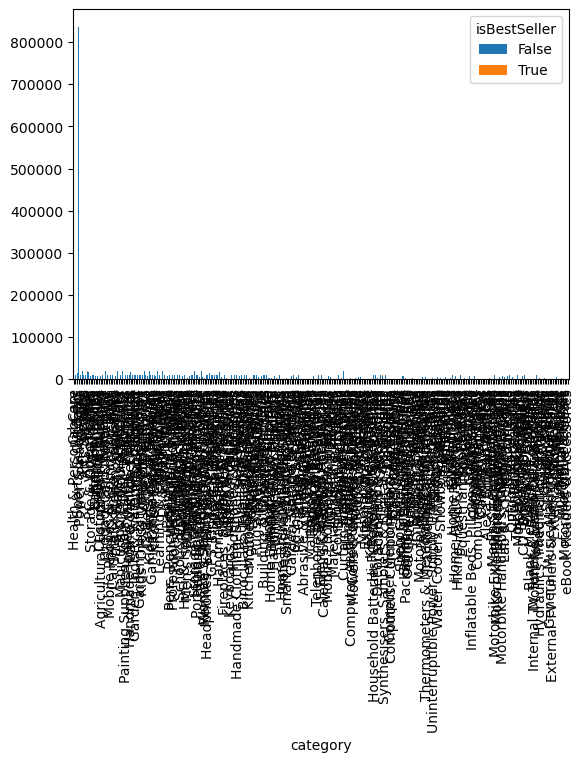

In [6]:
# Plotting a stacked bar chart for the 'crosstab_result' data
crosstab_result.plot(kind="bar", stacked=True);

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.


In [7]:

# 0. **Preliminary Step: Remove outliers in product prices.**
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Find outliers in price
outliers = tukeys_test_outliers(df['price'])

# Remove outliers from original df
df_no_outliers = df[~df.index.isin(outliers.index)]


print(f"Original data shape: {df.shape}")
print(f"Data shape without outliers: {df_no_outliers.shape}")
print(f"Number of outliers removed: {df.shape[0] - df_no_outliers.shape[0]}")

Original data shape: (2443651, 9)
Data shape without outliers: (2115963, 9)
Number of outliers removed: 327688


In [8]:
# Get top 20 categories by count (frequency)
top_20_categories = df_no_outliers['category'].value_counts().nlargest(20).index
# Filter the DataFrame to only include these top 20 categories
df_top_20 = df_no_outliers[df_no_outliers['category'].isin(top_20_categories)]


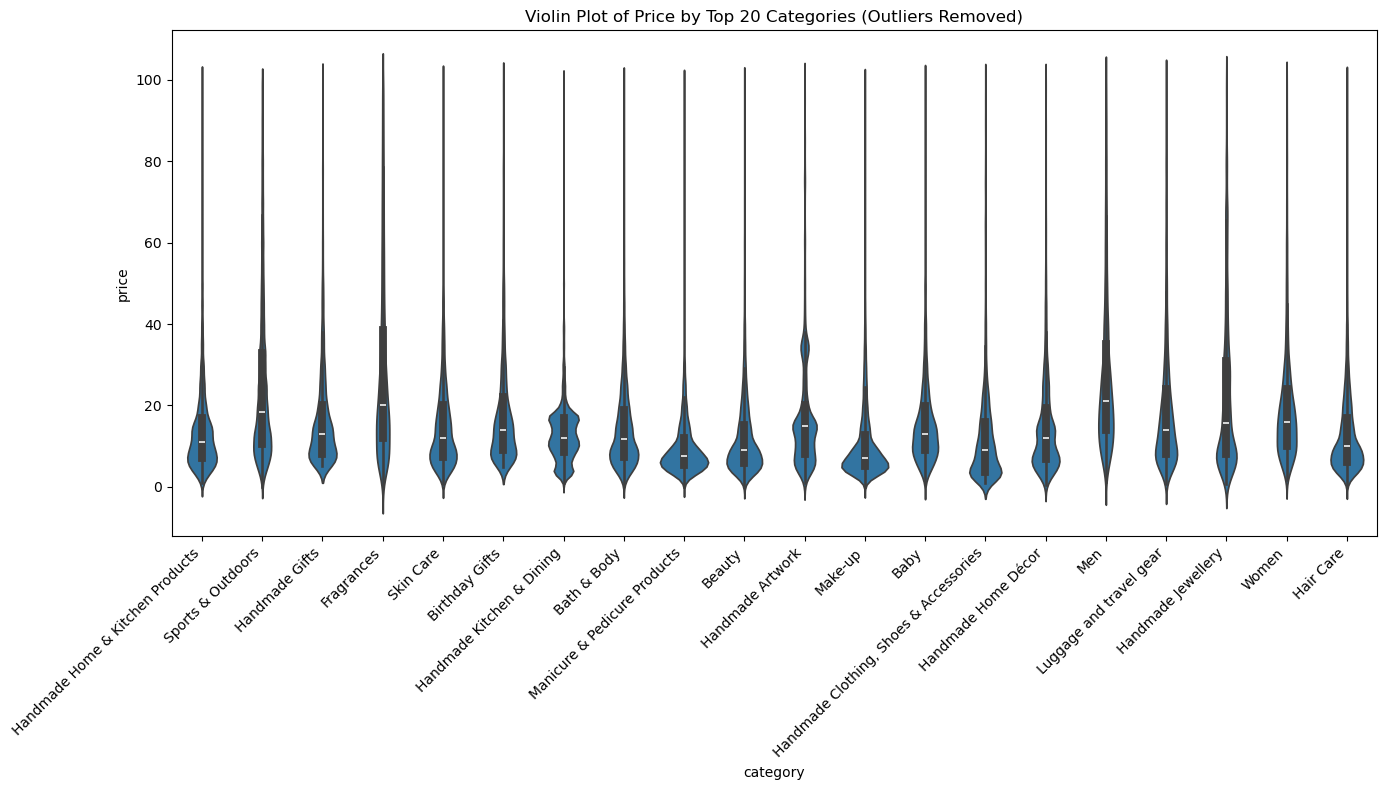

In [9]:
#1. Violin Plots:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 8))  
sns.violinplot(data=df_top_20, x='category', y='price')
plt.title("Violin Plot of Price by Top 20 Categories (Outliers Removed)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

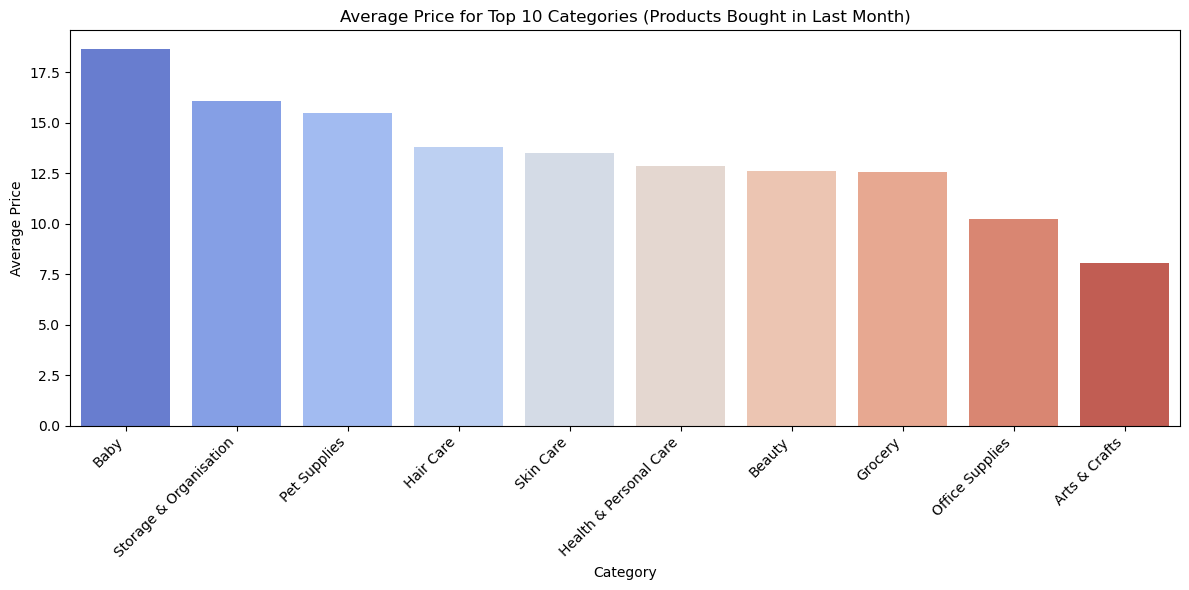

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
df_filtered = df[df['boughtInLastMonth'] > 0]
top_10_categories = df_filtered['category'].value_counts().nlargest(10).index
df_top_10 = df_filtered[df_filtered['category'].isin(top_10_categories)]
avg_price_by_category = df_top_10.groupby('category')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_category.index, y=avg_price_by_category.values, hue=avg_price_by_category.index, palette='coolwarm', legend=False)
plt.title('Average Price for Top 10 Categories (Products Bought in Last Month)')
plt.ylabel('Average Price')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()



Top 10 categories with the highest average price:
category
Laptops                       1087.987827
3D Printers                   1018.036129
Desktop PCs                    926.816064
Home Office Furniture          622.135898
Test & Measurement             559.382973
Home Audio Record Players      529.665585
CPUs                           514.519317
Digital Cameras                496.156185
Material Handling Products     487.191813
Graphics Cards                 444.746827
Name: price, dtype: float64


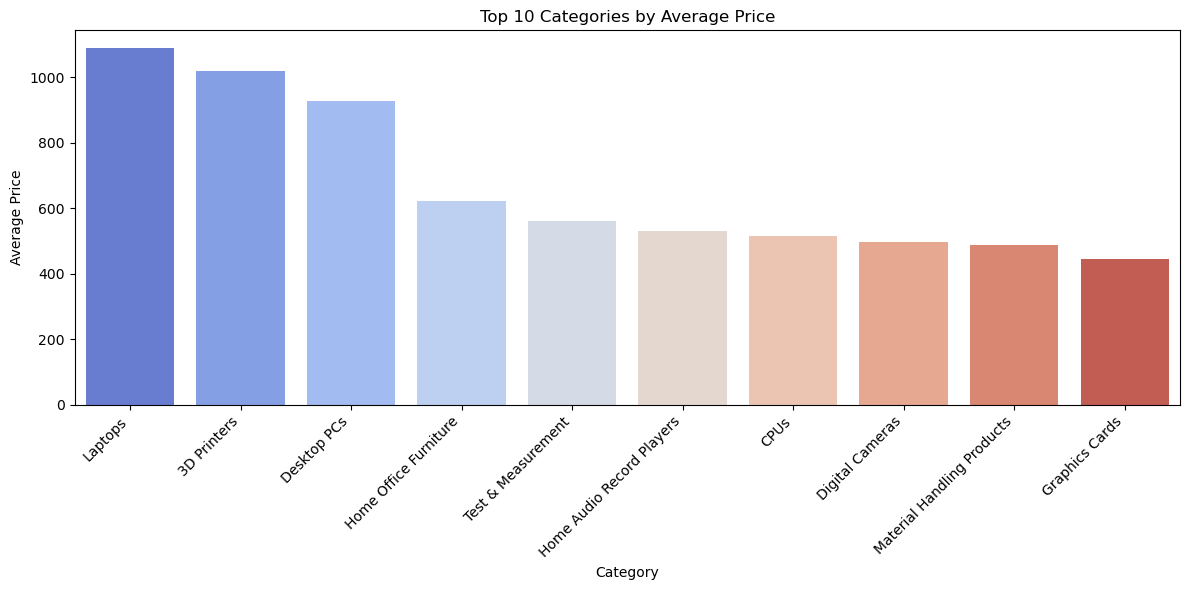

In [26]:
    #- Which product category commands the highest average price? Don't filter here by top categories.
import matplotlib.pyplot as plt
import seaborn as sns

avg_price_by_category_all = df.groupby('category')['price'].mean().sort_values(ascending=False)
top_10_avg_price = avg_price_by_category_all.head(10)
print("Top 10 categories with the highest average price:")
print(top_10_avg_price)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_avg_price.index, y=top_10_avg_price.values, 
            hue=top_10_avg_price.index, palette='coolwarm', legend=False)
plt.title('Top 10 Categories by Average Price')
plt.ylabel('Average Price')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

#Laptops have the highest average price of 1087.99

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.


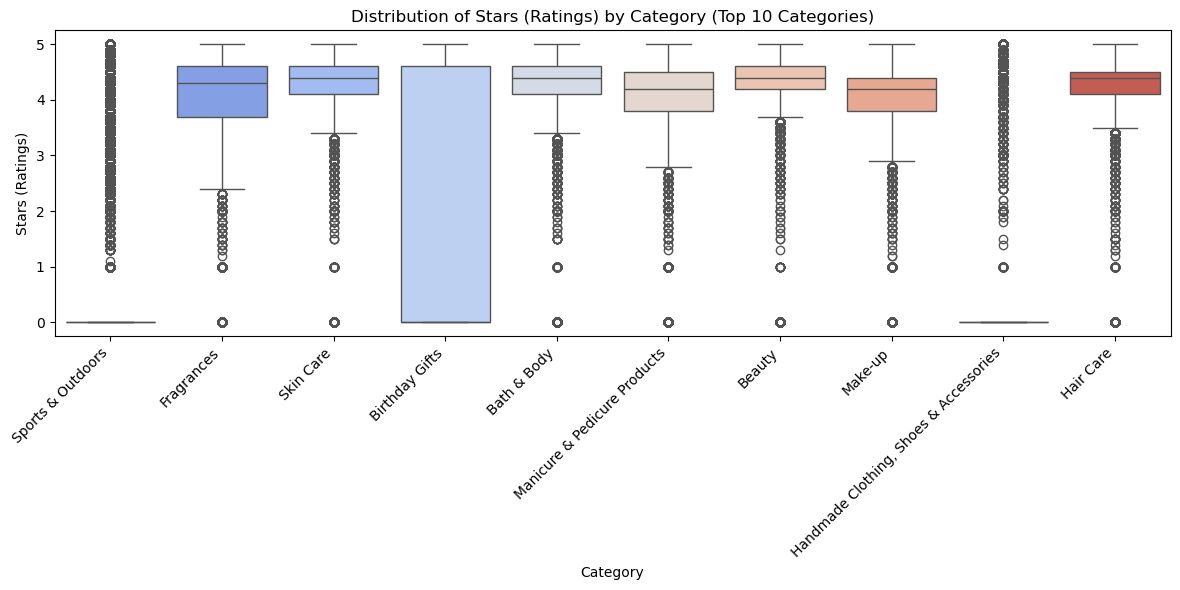

Category with the highest median rating:
category
Computer Memory    4.7
Name: stars, dtype: float64


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_categories = df['category'].value_counts().nlargest(10).index
df_top_10 = df[df['category'].isin(top_10_categories)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_10, x='category', y='stars', hue='category', palette='coolwarm', legend=False)
plt.title('Distribution of Stars (Ratings) by Category (Top 10 Categories)')
plt.xlabel('Category')
plt.ylabel('Stars (Ratings)')
plt.xticks(rotation=45, ha='right')  # Rotate category labels for better readability
plt.tight_layout()
plt.show()

median_rating_by_category = df.groupby('category')['stars'].median().sort_values(ascending=False)

highest_median_rating_category = median_rating_by_category.head(1)
print("Category with the highest median rating:")
print(highest_median_rating_category)


In [33]:
median_rating_by_category = df.groupby('category')['stars'].median().sort_values(ascending=False)

highest_median_rating_category = median_rating_by_category.head(1)
print("Category with the highest median rating:")
print(highest_median_rating_category)


Category with the highest median rating:
category
Computer Memory    4.7
Name: stars, dtype: float64


### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?


In [34]:
correlation = df['price'].corr(df['stars'])
print(f"Correlation coefficient between price and stars: {correlation:.4f}")

# There is little to no correlation between product price and rating.


Correlation coefficient between price and stars: -0.1249


2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 


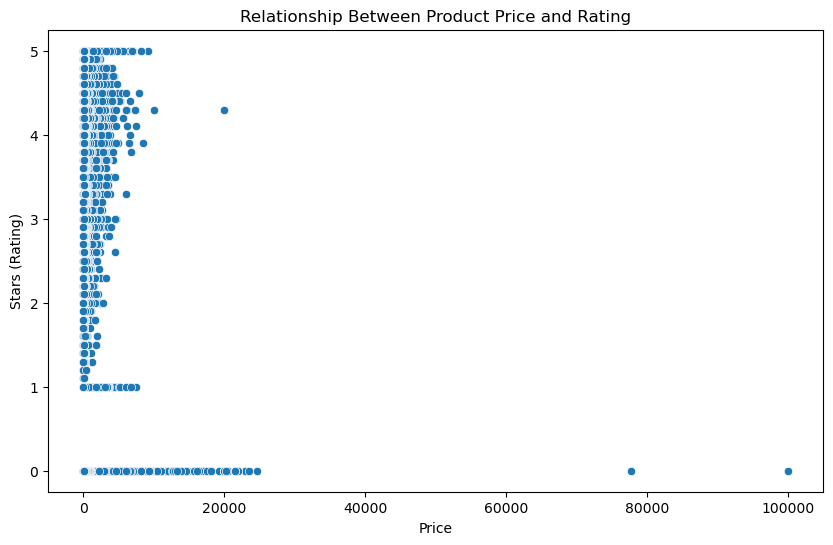

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to visualize the relationship between price and stars (ratings)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='stars', data=df)
plt.title('Relationship Between Product Price and Rating')
plt.xlabel('Price')
plt.ylabel('Stars (Rating)')
plt.show()


# 0-star products (those with no ratings) are "isolated" and show up as flat on the y-axis, 
# with no relation to price.

# Products with 1-5 stars show a slight positive trend, indicating that higher-rated products 
# tend to be more expensive, but it's not a perfect correlation.

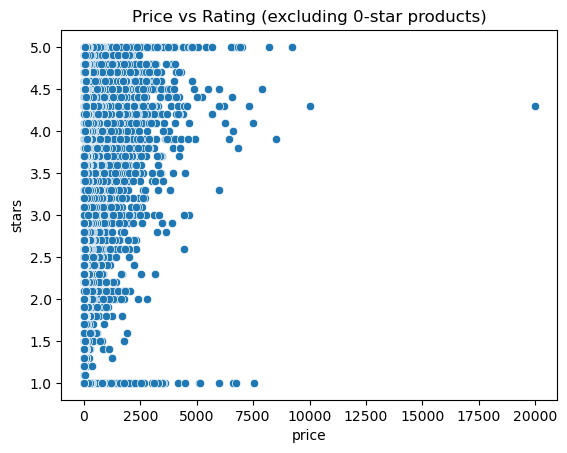

In [36]:
df_filtered = df[df['stars'] > 0]  # Remove 0-star products
sns.scatterplot(x='price', y='stars', data=df_filtered)
plt.title('Price vs Rating (excluding 0-star products)')
plt.show()

# Excluding 0-star products clarified the trend between price and ratings. Before the exclusion, 
# 0-star products created a "flat" region in the scatter plot, distorting the relationship. 
# After filtering them out, the analysis shows a clearer positive correlation, where products 
# with higher ratings tend to have slightly higher prices. This focused the analysis on products 
# with actual customer feedback, improving the relevance of the findings.
